# Importando


In [1]:
import matplotlib.pyplot as plt
import pandas as pd   
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def ColabOuCode(path_drive, path_local, ncolunas=None):
    '''
    Importa o DataFrame de acordo com a plataforma usada. Retorna um DataFrame.
    '''
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        df = pd.read_csv(path_drive)
    except:
        if ncolunas is None: df = pd.read_csv(path_local)
        else: df = pd.read_csv(path_local, nrows=ncolunas)
    return df


In [2]:
drive = '/content/drive/MyDrive/Colab Notebooks/TERA-desafio-3/data/dados_tratados.csv'
local = './data/dados_tratados.csv'

df = ColabOuCode(
    drive,
    local,
    ncolunas=50000
)

df.shape    

Mounted at /content/drive


(6362620, 10)

# Classificações

In [3]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.combine import SMOTEENN

## Separando e balanceando os dados

In [18]:
from sklearn.model_selection import train_test_split

x_df = df.drop('isFraud',axis=1)
y_df = df[['isFraud']]

X_treino, X_teste, y_treino, y_teste = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

In [53]:
sennComb = SMOTEENN(
    sampling_strategy=0.2,
    random_state=42,
    n_jobs=-1
)

X_comb, y_comb = sennComb.fit_resample(X_treino, y_treino)


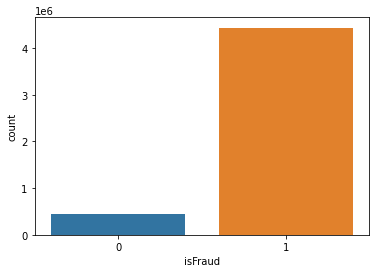

In [54]:
sns.countplot(y_comb['isFraud'])

## Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

arvoreDecisao = DecisionTreeClassifier(
    max_depth=13
)
arvoreDecisao.fit(X_comb, y_comb)

y_arvPred = arvoreDecisao.predict(X_teste)

confusion_matrix(y_teste, y_arvPred)


array([[   2415,      20],
       [  21394, 1884957]])

In [56]:
print(classification_report(y_teste, y_arvPred, target_names=['Fraude', 'Nao Fraude']))


              precision    recall  f1-score   support

      Fraude       0.10      0.99      0.18      2435
  Nao Fraude       1.00      0.99      0.99   1906351

    accuracy                           0.99   1908786
   macro avg       0.55      0.99      0.59   1908786
weighted avg       1.00      0.99      0.99   1908786



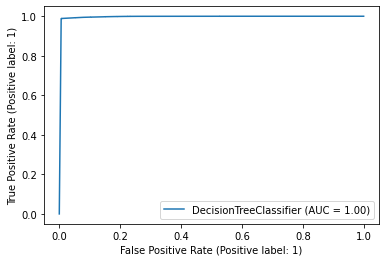

In [57]:
plot_roc_curve(arvoreDecisao, X_teste, y_teste,)
plt.show()

## Random Forest


In [58]:
from sklearn.ensemble import RandomForestClassifier

randForest = RandomForestClassifier(
    n_estimators=100,
    max_depth=13,
)

randForest.fit(X_comb, y_comb)

y_arvRandPred = randForest.predict(X_teste)

confusion_matrix(y_teste, y_arvRandPred)


array([[   1952,     483],
       [   2068, 1904283]])

In [59]:
print(classification_report(y_teste, y_arvRandPred, target_names=['Fraude', 'Nao Fraude']))


              precision    recall  f1-score   support

      Fraude       0.49      0.80      0.60      2435
  Nao Fraude       1.00      1.00      1.00   1906351

    accuracy                           1.00   1908786
   macro avg       0.74      0.90      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



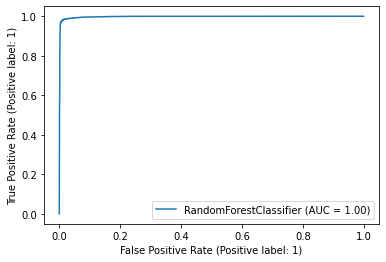

In [60]:
plot_roc_curve(randForest, X_teste, y_teste,)
plt.show()

## XGBoost

In [101]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    max_depth=13,
    n_estimators=13,
    subsample=0.55,
    gpu_id='0',
    tree_method='gpu_hist'

)

xgb.fit(X_comb, y_comb) 
y_xgb = xgb.predict(X_teste)

confusion_matrix(y_teste, y_xgb)

array([[   2413,      22],
       [  12690, 1893661]])

In [102]:
print(classification_report(y_teste, y_xgb, target_names=['Fraude', 'Nao Fraude']))


              precision    recall  f1-score   support

      Fraude       0.16      0.99      0.28      2435
  Nao Fraude       1.00      0.99      1.00   1906351

    accuracy                           0.99   1908786
   macro avg       0.58      0.99      0.64   1908786
weighted avg       1.00      0.99      1.00   1908786



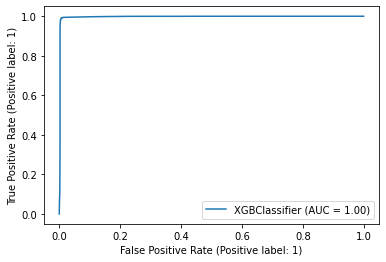

In [63]:
plot_roc_curve(xgb, X_teste, y_teste)
plt.show()